In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


Key Features:
* Entity: The name of the country or region for which the data is reported.
* Year: The year for which the data is reported, ranging from 2000 to 2020.
* Access to electricity (% of population): The percentage of population with access to electricity.
* Access to clean fuels for cooking (% of population): The percentage of the population with primary reliance on clean fuels.
* Renewable-electricity-generating-capacity-per-capita: Installed Renewable energy capacity per person
* Financial flows to developing countries (US $): Aid and assistance from developed countries for clean energy projects.
* Renewable energy share in total final energy consumption (%): Percentage of renewable energy in final energy consumption.
* Electricity from fossil fuels (TWh): Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
* Electricity from nuclear (TWh): Electricity generated from nuclear power in terawatt-hours.
* Electricity from renewables (TWh): Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
* Low-carbon electricity (% electricity): Percentage of electricity from low-carbon sources (nuclear and renewables).
* Primary energy consumption per capita (kWh/person): Energy consumption per person in kilowatt-hours.
* Energy intensity level of primary energy (MJ/$2011 PPP GDP): Energy use per unit of GDP at purchasing power parity.
* Value_co2_emissions (metric tons per capita): Carbon dioxide emissions per person in metric tons.
* Renewables (% equivalent primary energy): Equivalent primary energy that is derived from renewable sources.
* GDP growth (annual %): Annual GDP growth rate based on constant local currency.
* GDP per capita: Gross domestic product per person.
* Density (P/Km2): Population density in persons per square kilometer.
* Land Area (Km2): Total land area in square kilometers.
* Latitude: Latitude of the country's centroid in decimal degrees.
* Longitude: Longitude of the country's centroid in decimal degrees.

In [321]:
df = pd.read_csv(r"C:\Practica_Analisis_De_Datos\Consumo_energetico\global-data-on-sustainable-energy (1).csv")
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [322]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

PREPROCESANDO EL DATASET(CAMBIANDO NULOS O ELIMINANDOLOS,BORRANDO DUPLICADOS,etc)

Cambiando el tipo de la columna Density

In [324]:
df["Density\\n(P/Km2)"] = df["Density\\n(P/Km2)"].replace(',', '', regex=True)
df["Density\\n(P/Km2)"] = df["Density\\n(P/Km2)"].astype(float, errors='ignore')

Formateando la columna Year


In [325]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


Borrando duplicados

In [326]:
df = df.drop_duplicates().reset_index(drop=True)

Reemplazando los nulos de las columnas por el promedio de la misma medida

In [327]:
df = df.fillna(df.mean(numeric_only=True))
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000-01-01,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,11.986707,3.441610,13283.774348,60.0,652230.0,33.939110,67.709953
1,Afghanistan,2001-01-01,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,11.986707,3.441610,13283.774348,60.0,652230.0,33.939110,67.709953
2,Afghanistan,2002-01-01,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,11.986707,3.441610,179.426579,60.0,652230.0,33.939110,67.709953
3,Afghanistan,2003-01-01,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,11.986707,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004-01-01,20.064968,10.9,7.75,94224000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,11.986707,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016-01-01,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,11.986707,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017-01-01,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,11.986707,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018-01-01,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,11.986707,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019-01-01,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,11.986707,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


Promedio del porcentaje de la poblacion que tenia acceso a la electricidad a lo largo de los años

Text(0.5, 1.0, 'Promedio del porcentaje de la poblacion con acceso a electricidad a lo largo de los años ')

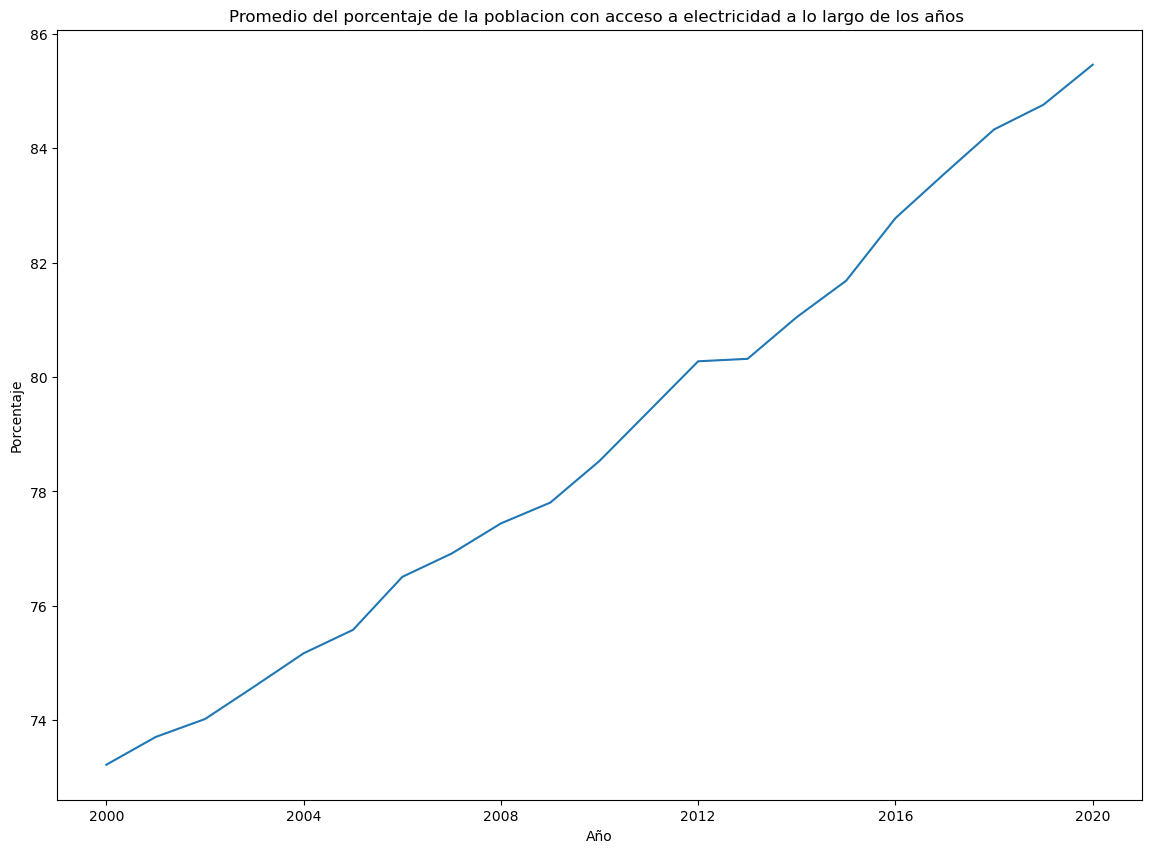

In [328]:
df_promedio_porcentaje = df.groupby(by="Year")['Access to electricity (% of population)'].mean().reset_index()
plt.figure(figsize=(14,10))
sns.lineplot(data=df_promedio_porcentaje,x="Year",y="Access to electricity (% of population)")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.title("Promedio del porcentaje de la poblacion con acceso a electricidad a lo largo de los años ")

Se observa un aumento aunque lento global del acceso a la electricidad

Top 10  paises con peor porcentaje de acceso a combustibles limpios para cocinar en 2020

Text(0.5, 1.0, 'Top 10  paises con peor porcentaje de acceso a combustibles limpios para cocinar en 2020')

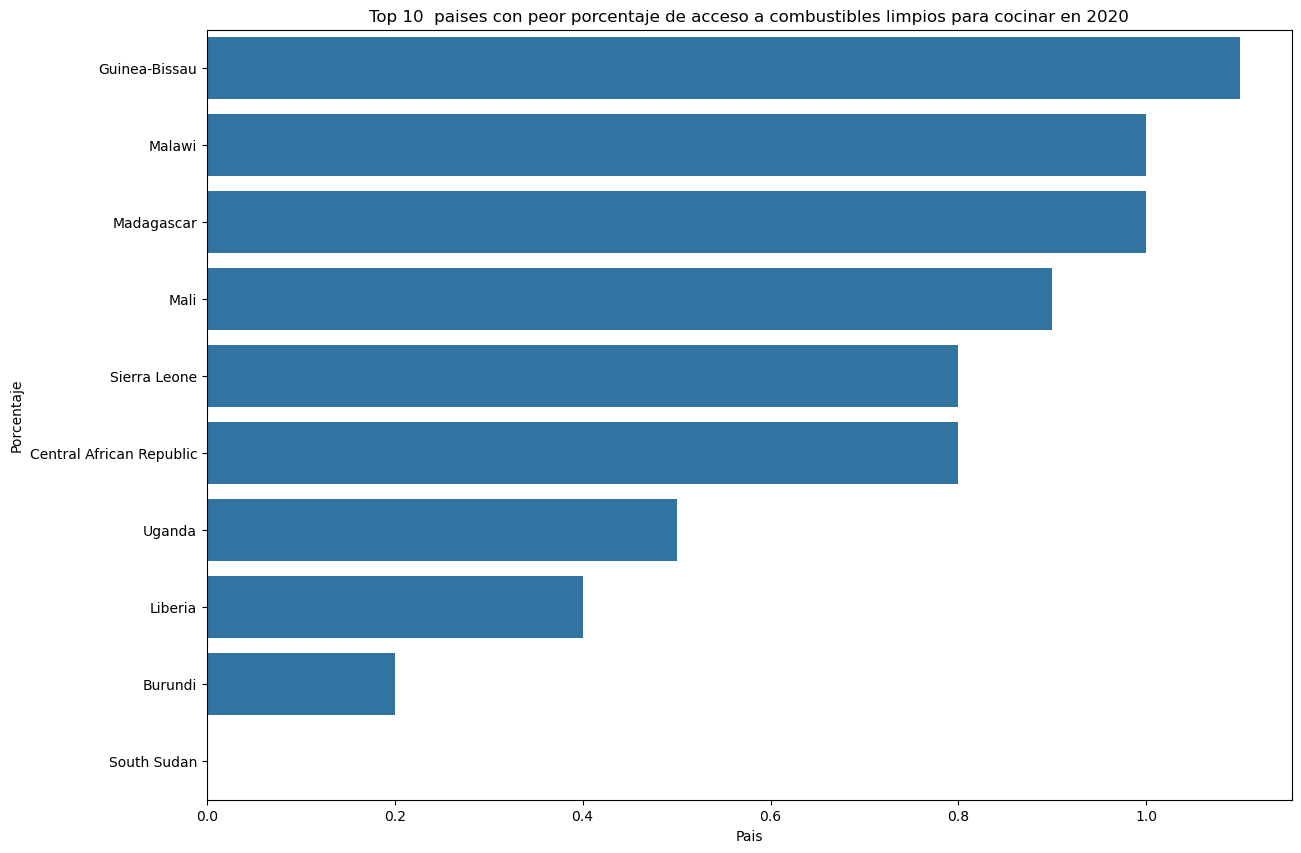

In [329]:
df_aux = df[df['Year'].dt.year == 2020]
df_peores_paises_accceso_cocina = df_aux.sort_values(by='Access to clean fuels for cooking',ascending=False).tail(10)
plt.figure(figsize=(14,10))
sns.barplot(data=df_peores_paises_accceso_cocina,x="Access to clean fuels for cooking",y="Entity")
plt.xlabel("Pais")
plt.ylabel("Porcentaje")
plt.title("Top 10  paises con peor porcentaje de acceso a combustibles limpios para cocinar en 2020")

Los paises africanos son los peores con acceso a combustibles para la cocina y tambien presentan porcentajes muy bajos, esto sugiere una mayor inversion para mejorar el acceso

Capacidad de energia renovable a lo largo de los años

In [353]:
df_aux1 = df.groupby(by="Year")["Renewable-electricity-generating-capacity-per-capita"].sum().reset_index()


Text(0.5, 1.0, 'Capacidad de energia renovable a lo largo de los años')

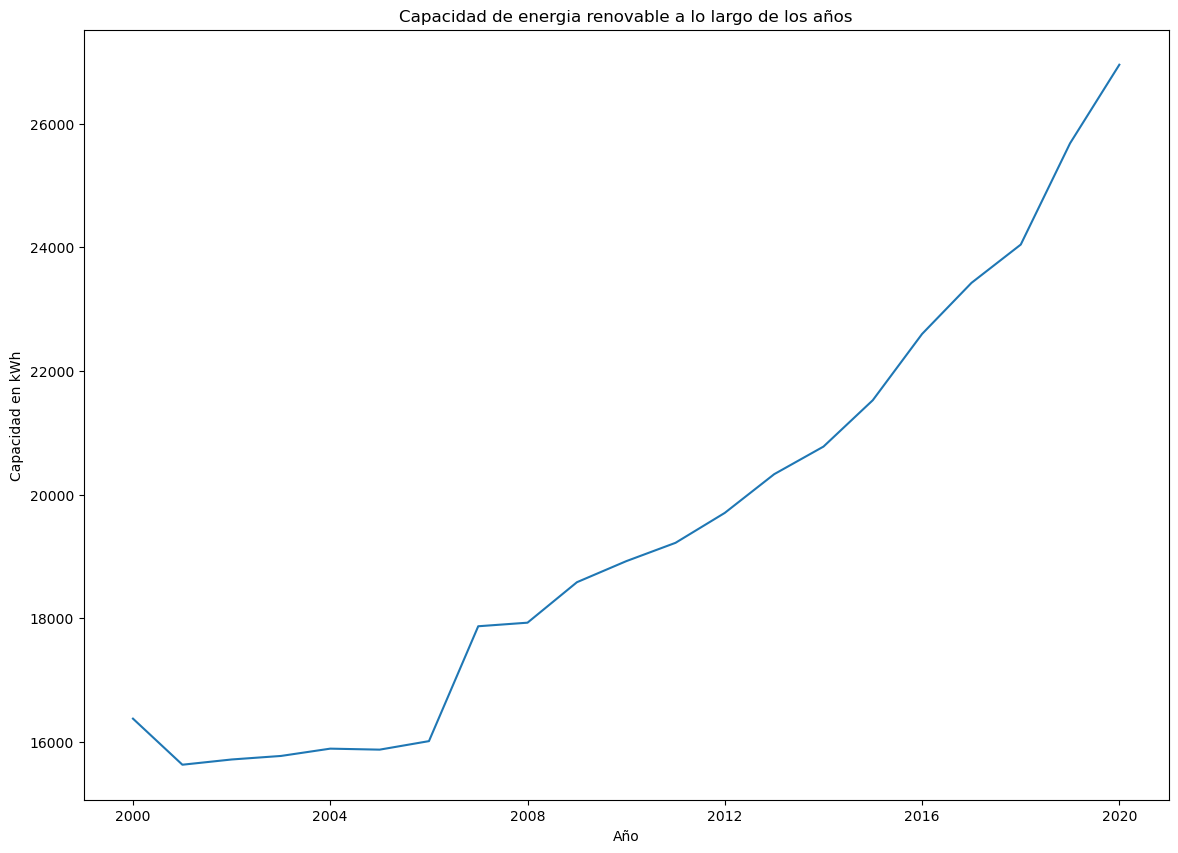

In [354]:
plt.figure(figsize=(14,10))
sns.lineplot(data=df_aux1,x="Year",y="Renewable-electricity-generating-capacity-per-capita")
plt.xlabel("Año")
plt.ylabel("Capacidad en kWh")
plt.title("Capacidad de energia renovable a lo largo de los años")

* Entre 2000 y 2005, la capacidad se mantuvo relativamente estable con ligeras variaciones.
* A partir de 2006, se observa un crecimiento sostenido y acelerado, especialmente desde 2015, donde la pendiente se vuelve más pronunciada.
* Esto indica un incremento constante en la inversión y adopción de tecnologías renovables, probablemente impulsado por políticas energéticas, avances tecnológicos y mayor conciencia ambiental.

Paises con mayor ayuda extranjera para la inversion en energias renovables(en los 20 años que el dataset tiene registro)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'French Guiana'),
  Text(1, 0, 'South Sudan'),
  Text(2, 0, 'Cuba'),
  Text(3, 0, 'Dominican Republic'),
  Text(4, 0, 'Algeria'),
  Text(5, 0, 'Namibia'),
  Text(6, 0, 'Burkina Faso'),
  Text(7, 0, 'Bhutan'),
  Text(8, 0, 'Malaysia'),
  Text(9, 0, 'Malawi')])

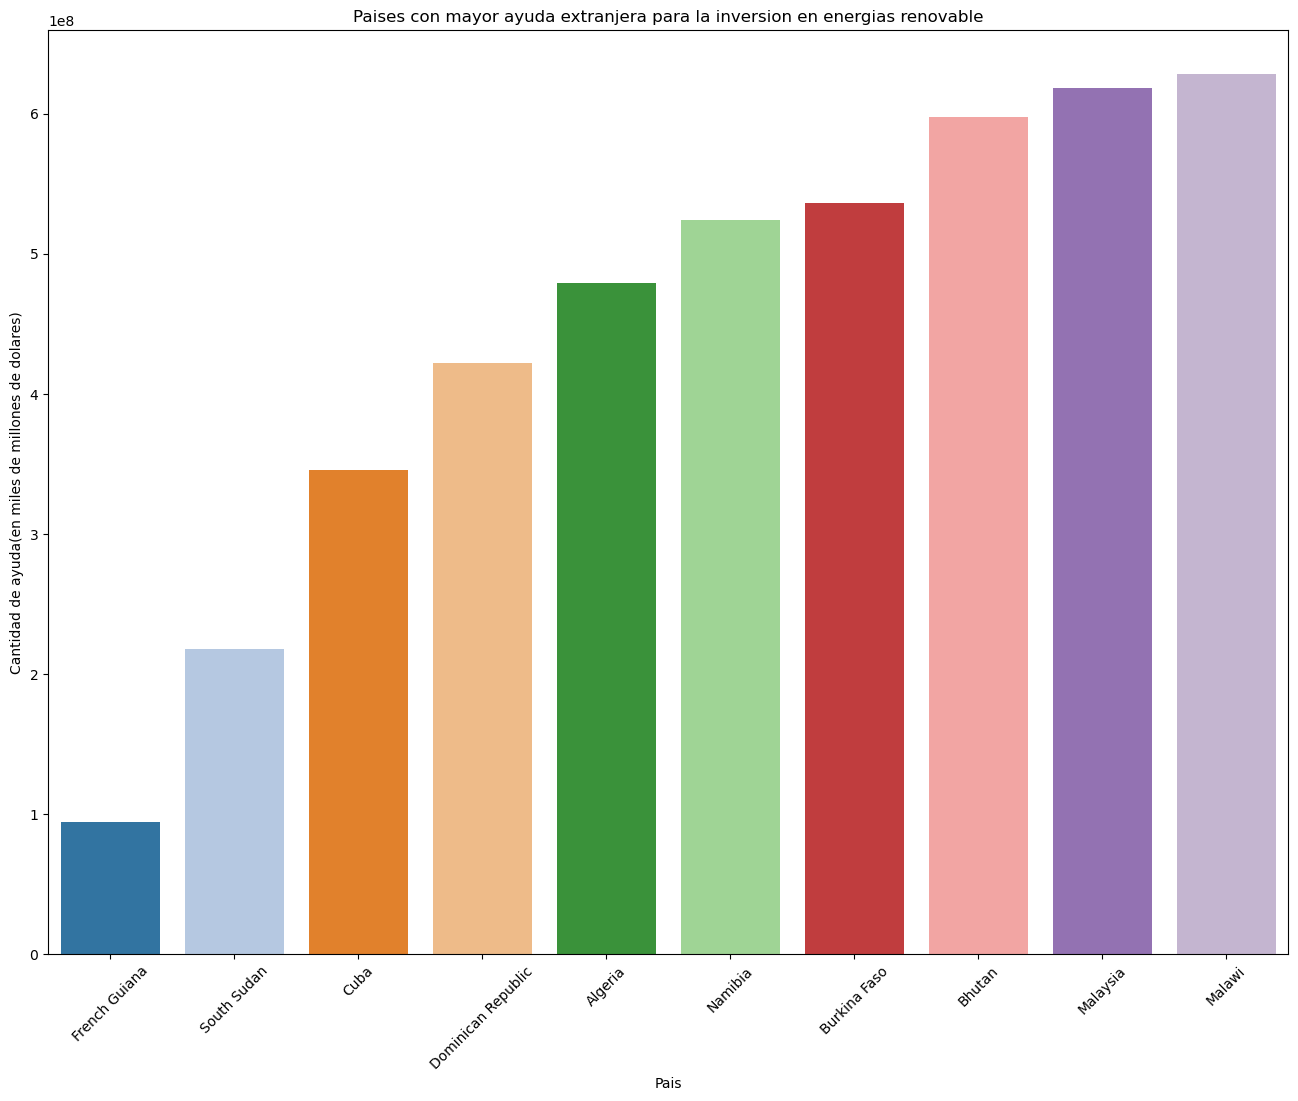

In [332]:
df_mayor_ayuda = df.groupby(by="Entity")["Financial flows to developing countries (US $)"].sum().reset_index()
df_mayor_ayuda = df_mayor_ayuda.sort_values(by="Financial flows to developing countries (US $)")
df_mayor_ayuda = df_mayor_ayuda.head(10)
plt.figure(figsize=(16,12))
sns.barplot(data=df_mayor_ayuda,y="Financial flows to developing countries (US $)",x="Entity",hue="Entity",dodge=False,palette="tab20",legend=False)
plt.xlabel("Pais")
plt.ylabel("Cantidad de ayuda(en miles de millones de dolares)")
plt.title("Paises con mayor ayuda extranjera para la inversion en energias renovable")
plt.xticks(rotation=45)


Top 10 Paises con mayor participacion de energias renovables en el consumo final

Text(0.5, 1.0, 'Paises con mayor participacion de energias renovables en el consumo final')

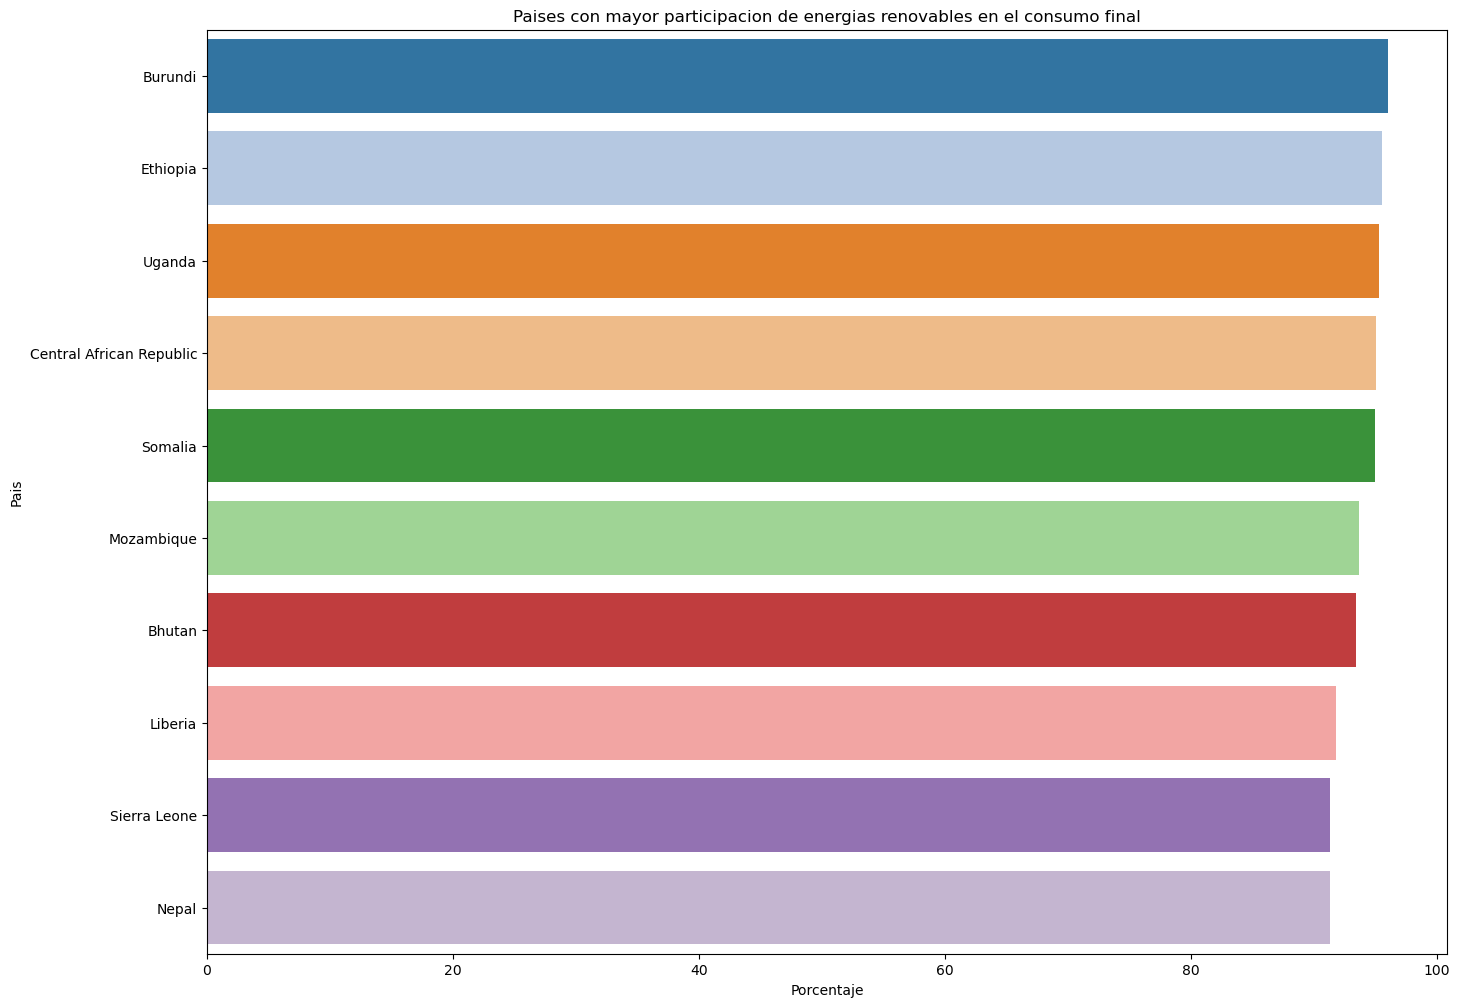

In [333]:
df_mayor_energia_consumo_final = (df.loc[df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"]
                                         .idxmax()].sort_values(by="Renewable energy share in the total final energy consumption (%)", ascending=False).head(10))
plt.figure(figsize=(16,12))
sns.barplot(data=df_mayor_energia_consumo_final,x="Renewable energy share in the total final energy consumption (%)",y="Entity",hue="Entity",dodge=False,palette="tab20",legend=False)
plt.ylabel("Pais")
plt.xlabel("Porcentaje")
plt.title("Paises con mayor participacion de energias renovables en el consumo final")


Acá sorprende que los paises desarrollados no son los que tienen mayor porcentaje de energias renovables

Cantidad promedio de generación de combustibles fosiles/nucleares/renovables a lo largo de los años

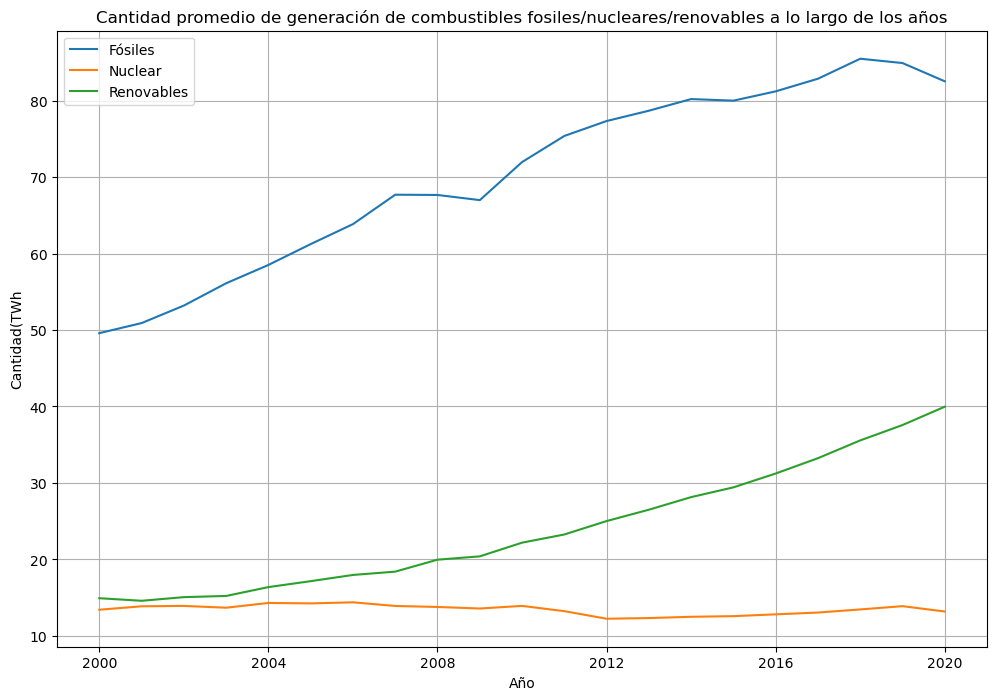

In [334]:
df_comb_fosiles = df.groupby(by="Year")["Electricity from fossil fuels (TWh)"].mean().reset_index()
df_comb_nuclear = df.groupby(by="Year")["Electricity from nuclear (TWh)"].mean().reset_index()
df_comb_renovables = df.groupby(by="Year")["Electricity from renewables (TWh)"].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=df_comb_fosiles,x="Year",y="Electricity from fossil fuels (TWh)",label="Fósiles")
sns.lineplot(data=df_comb_nuclear,x="Year",y="Electricity from nuclear (TWh)",label="Nuclear")
sns.lineplot(data=df_comb_renovables,x="Year",y="Electricity from renewables (TWh)",label="Renovables")
plt.xlabel("Año")
plt.ylabel("Cantidad(TWh")
plt.title("Cantidad promedio de generación de combustibles fosiles/nucleares/renovables a lo largo de los años")

plt.grid()

Aunque las energias renovables han tomado fuerza,la generacion de combustibles fosiles va en aumento y la energia nuclear ha perdido peso en la generacion

Proporcion global de energias en el 2000

Text(0.5, 1.0, 'Proporcion global de energias en el 2000')

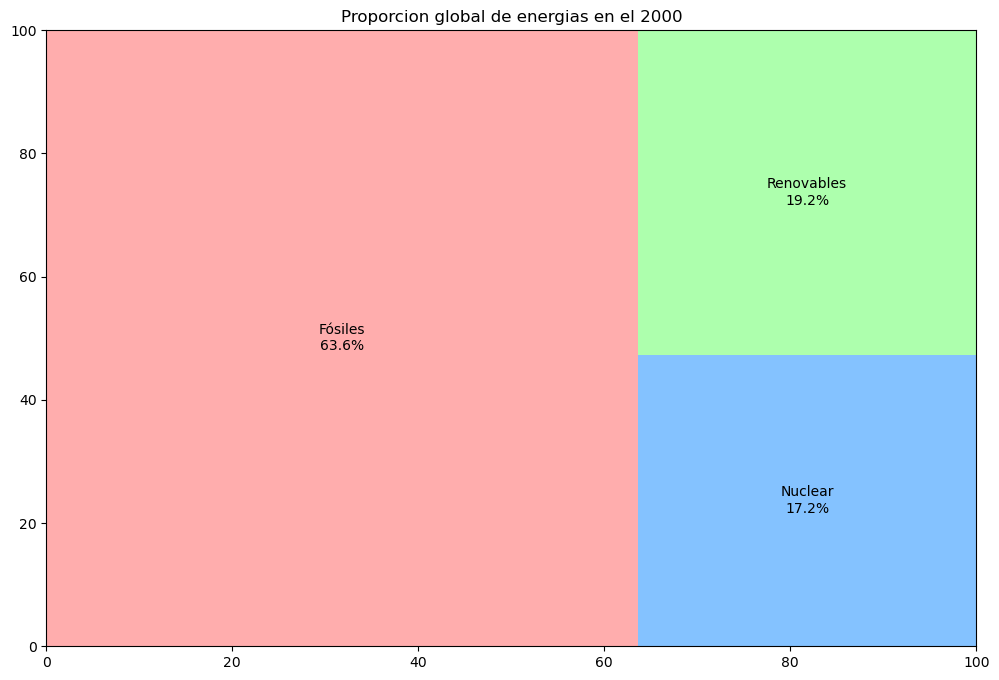

In [335]:
df_2000 = df.loc[df["Year"].dt.year == 2000]
total_combustibles = df_2000["Electricity from fossil fuels (TWh)"].sum() + df_2000["Electricity from nuclear (TWh)"].sum() + df_2000["Electricity from renewables (TWh)"].sum()
porcentaje_fosiles = df_2000["Electricity from fossil fuels (TWh)"].sum()/total_combustibles
porcentaje_renovables = df_2000["Electricity from renewables (TWh)"].sum()/total_combustibles
porcentaje_nuclear = df_2000["Electricity from nuclear (TWh)"].sum()/total_combustibles
plt.figure(figsize=(12,8))
squarify.plot(sizes=[porcentaje_fosiles,porcentaje_nuclear,porcentaje_renovables],label=[f"Fósiles\n{porcentaje_fosiles*100:.1f}%",f"Nuclear\n{porcentaje_nuclear*100:.1f}%",f"Renovables\n{porcentaje_renovables*100:.1f}%"],alpha=0.8,color= ['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Proporcion global de energias en el 2000")



Proporcion global de energias en el 2010

Text(0.5, 1.0, 'Proporcion global de energias en el 2020')

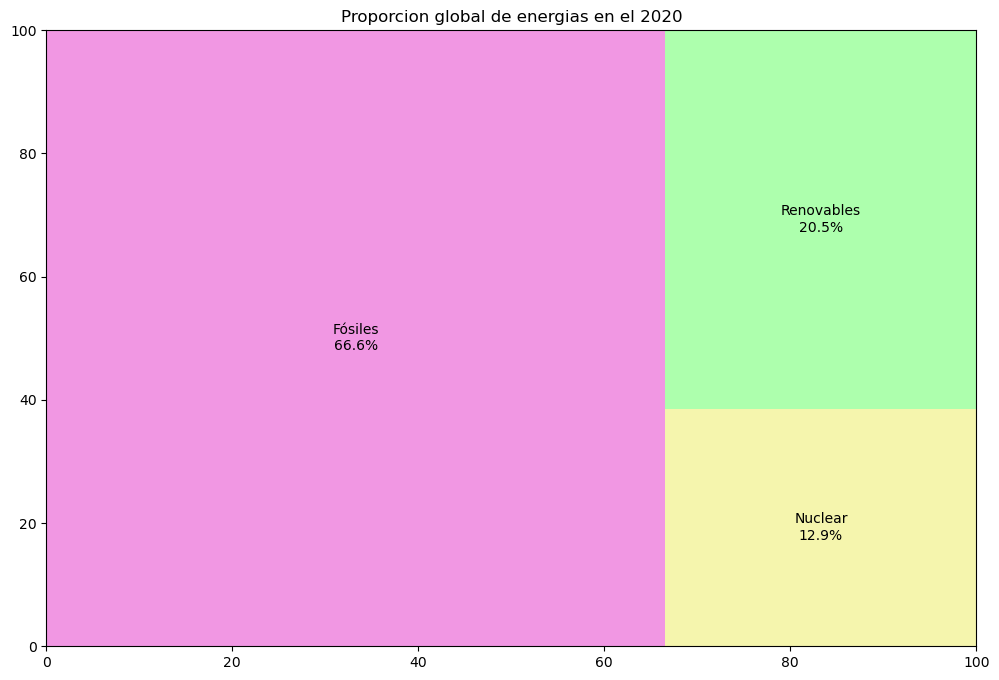

In [336]:
df_2010 = df.loc[df["Year"].dt.year == 2010]
total_combustibles = df_2010["Electricity from fossil fuels (TWh)"].sum() + df_2010["Electricity from nuclear (TWh)"].sum() + df_2010["Electricity from renewables (TWh)"].sum()
porcentaje_fosiles = df_2010["Electricity from fossil fuels (TWh)"].sum()/total_combustibles
porcentaje_renovables = df_2010["Electricity from renewables (TWh)"].sum()/total_combustibles
porcentaje_nuclear = df_2010["Electricity from nuclear (TWh)"].sum()/total_combustibles
plt.figure(figsize=(12,8))
squarify.plot(sizes=[porcentaje_fosiles,porcentaje_nuclear,porcentaje_renovables],label=[f"Fósiles\n{porcentaje_fosiles*100:.1f}%",f"Nuclear\n{porcentaje_nuclear*100:.1f}%",f"Renovables\n{porcentaje_renovables*100:.1f}%"],alpha=0.8,color= ["#ee7ddd", "#f3f399", '#99ff99'])
plt.title("Proporcion global de energias en el 2020")


Proporcion global de energias en el 2020

Text(0.5, 1.0, 'Proporcion global de energias en el 2020')

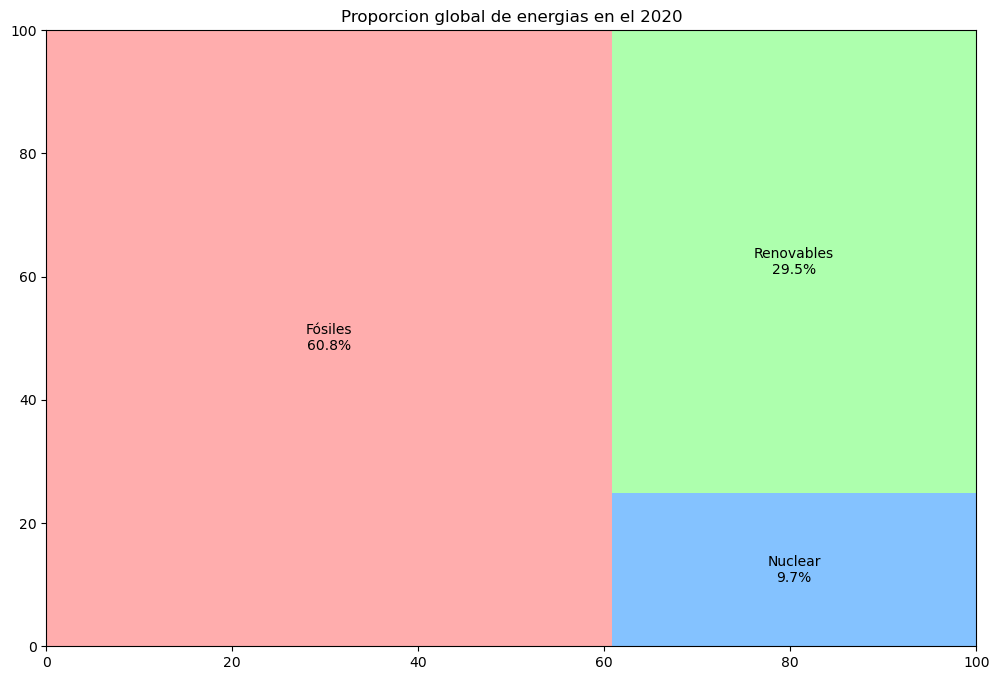

In [337]:
df_2020 = df.loc[df["Year"].dt.year == 2020]
total_combustibles = df_2020["Electricity from fossil fuels (TWh)"].sum() + df_2020["Electricity from nuclear (TWh)"].sum() + df_2020["Electricity from renewables (TWh)"].sum()
porcentaje_fosiles = df_2020["Electricity from fossil fuels (TWh)"].sum()/total_combustibles
porcentaje_renovables = df_2020["Electricity from renewables (TWh)"].sum()/total_combustibles
porcentaje_nuclear = df_2020["Electricity from nuclear (TWh)"].sum()/total_combustibles
plt.figure(figsize=(12,8))
squarify.plot(sizes=[porcentaje_fosiles,porcentaje_nuclear,porcentaje_renovables],label=[f"Fósiles\n{porcentaje_fosiles*100:.1f}%",f"Nuclear\n{porcentaje_nuclear*100:.1f}%",f"Renovables\n{porcentaje_renovables*100:.1f}%"],alpha=0.8,color= ['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Proporcion global de energias en el 2020")


A lo largo de 20 años se observa que la participacion de energia nuclear ha disminuido en un 8% aproximadamente, mientras que las fósiles han disminuido aunque en un porcentaje muy bajo, y para las renovables se ha aumentado en un 10% su participacion, esto nos indica una transicion de la matriz energetica a energias renovables, tambien muestra una alta dependecia a las energias fósiles

Analizando la relacion entre el PIB per capita y el consumo de energia primaria

Text(0, 0.5, 'Consumo de energia primaria per capita(kWh/persona)')

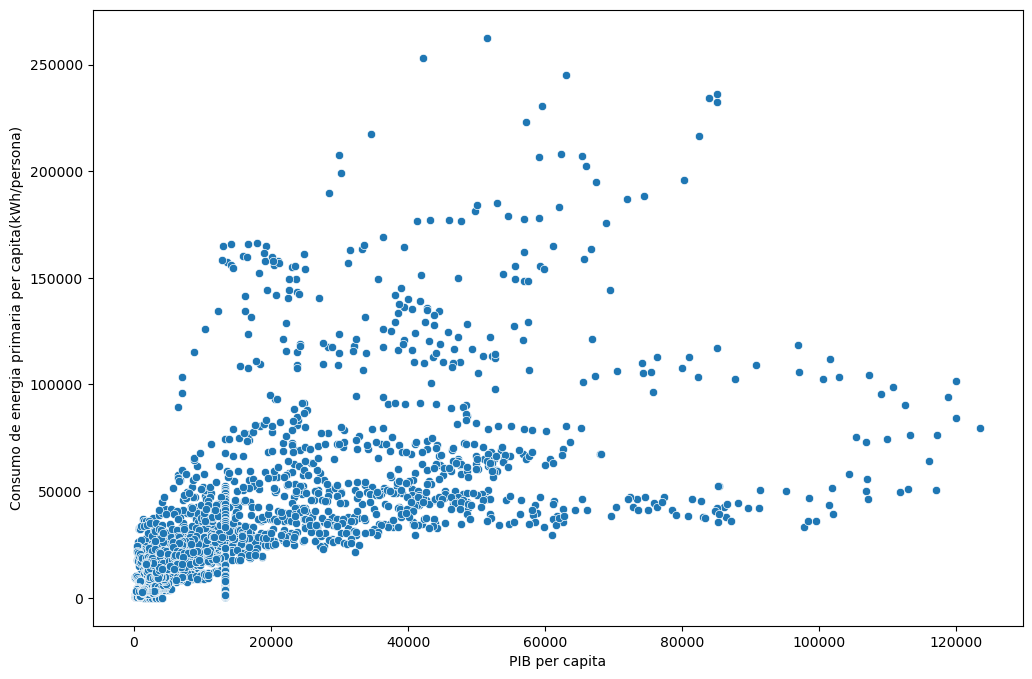

In [338]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="gdp_per_capita",y="Primary energy consumption per capita (kWh/person)")
plt.xlabel("PIB per capita")
plt.ylabel("Consumo de energia primaria per capita(kWh/persona)")

Se observa que la relacion es muy dispersa, indica que no importa si el PIB per capita es grande el consumo no aumenta, esto quizas indice una conciencia en los paises desarrollados en el gasto energetico o una eficiencia en estos paises

Analizando cantidad de emisiones de C02 frente a la cantidad generada de energias renovables

Text(0, 0.5, 'Electricidad de energias renovables(TWh)')

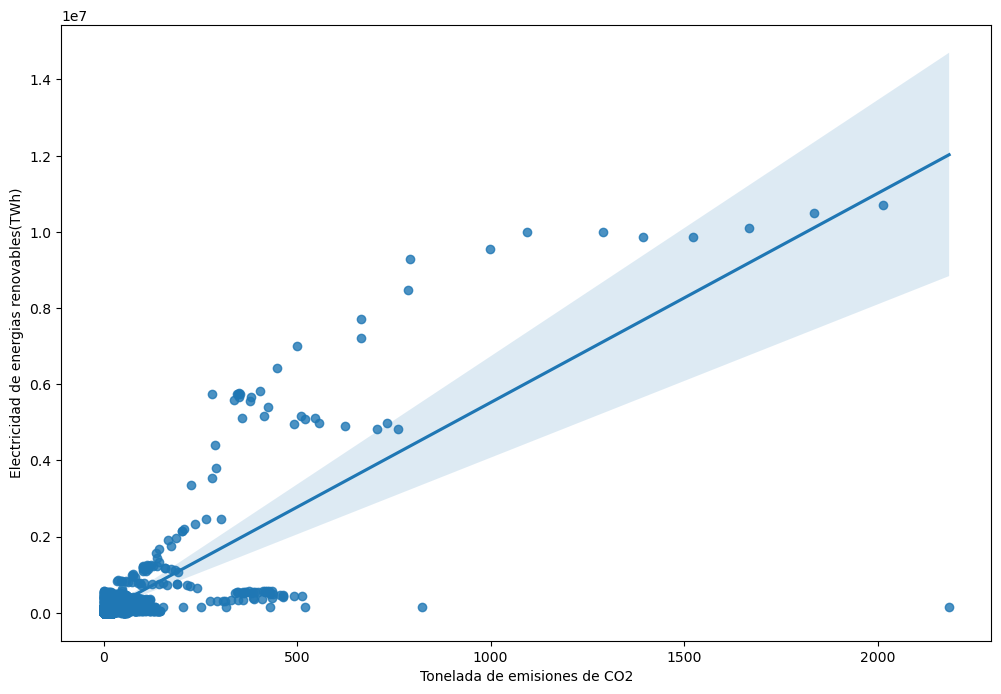

In [339]:
plt.figure(figsize=(12,8))
sns.regplot(data=df,y="Value_co2_emissions_kt_by_country",x="Electricity from renewables (TWh)")
plt.xlabel("Tonelada de emisiones de CO2")
plt.ylabel("Electricidad de energias renovables(TWh)")

La relacion es una relacion lineal positiva,lo cual , esto indica que a mayor cantidad  de energias renovables el CO2 aumenta,esto puede ser debido a los procesos subyacentes de las energias renovables(fabricacion y repuestos de los componentes,transporte e instalacion,entre otras). Esto ayuda a mostrar que siempre a mayor cantidad de energias renovables no disminuye la cantidad de CO2 emitido.Aunque la correlación es positiva, esto no significa que las energías renovables incrementen las emisiones, sino que ambos indicadores crecen en paralelo en economías con alta demanda energética

Analizando la relacion entre los años,el crecimiento del PIB y el porcentaje de participacion energias renovables en la energia primaria

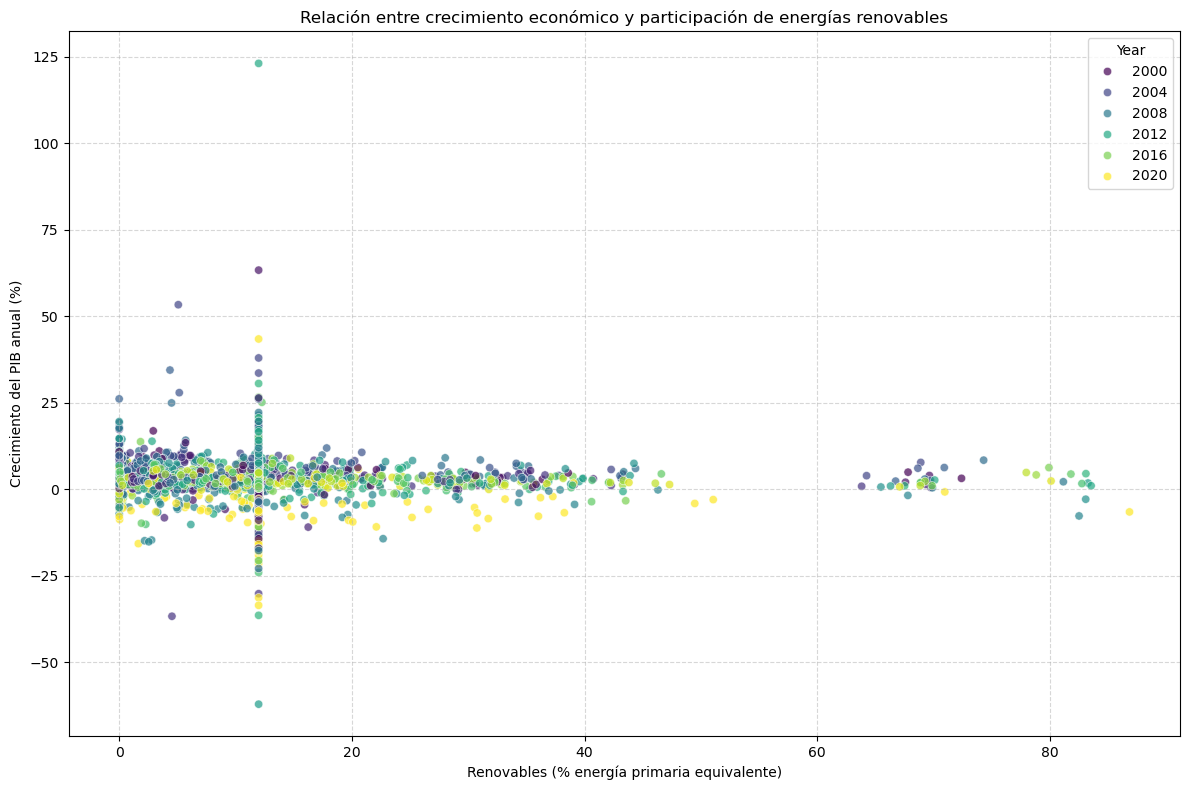

In [340]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="Renewables (% equivalent primary energy)",y="gdp_growth",hue=df["Year"].dt.year,palette="viridis", alpha=0.7)
plt.xlabel("Renovables (% energía primaria equivalente)")
plt.ylabel("Crecimiento del PIB anual (%)")
plt.title("Relación entre crecimiento económico y participación de energías renovables")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


El gráfico muestra que no importa el porcentaje del crecimiento del PIB no hay mayor inversion en energias renovables sin importar el año, a pesar de unos pequeños puntos que muestran un mayor porcentaje de renovables pero en años donde el PIB practicamente no aumentó

Top 10 paises con mayor porcentaje de energias renovables en su matriz energetica en 2000,2010 y 2020

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6184\1621993131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="crest")


Text(0.5, 1.0, 'Porcentaje de renovables por país en el 2000')

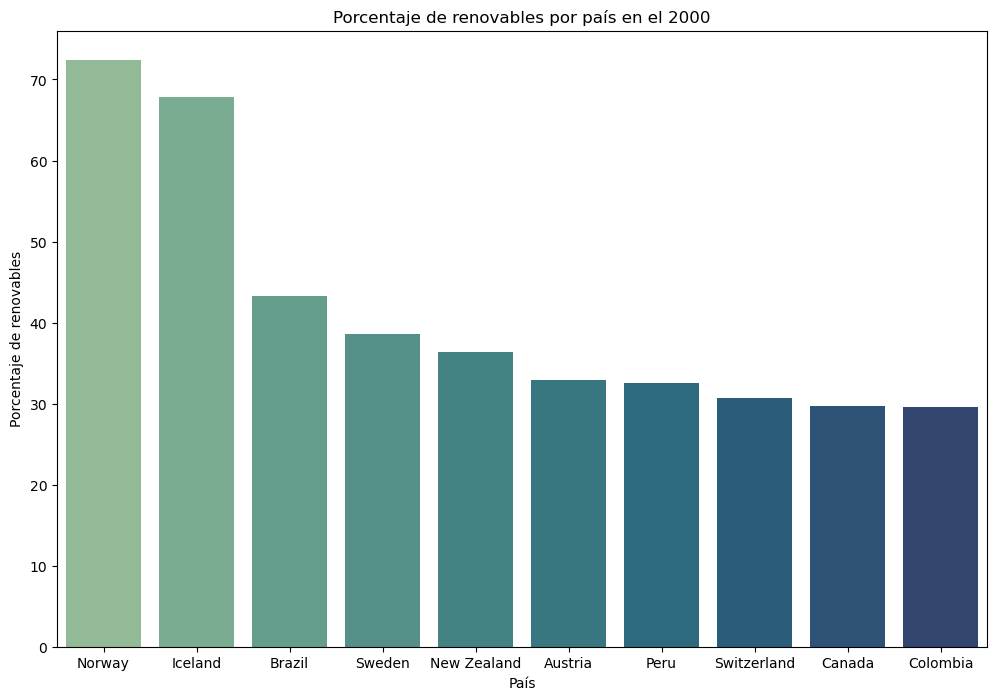

In [341]:
df_top_paises_mas_renovables = df.loc[df["Year"].dt.year == 2000]
df_top_paises_mas_renovables = df_top_paises_mas_renovables.sort_values(by="Renewables (% equivalent primary energy)",ascending=False)
df_top_paises_mas_renovables = df_top_paises_mas_renovables.head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="crest")
plt.xlabel("País")
plt.ylabel("Porcentaje de renovables")
plt.title("Porcentaje de renovables por país en el 2000")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6184\1868579339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="viridis")


Text(0.5, 1.0, 'Porcentaje de renovables por país en el 2010')

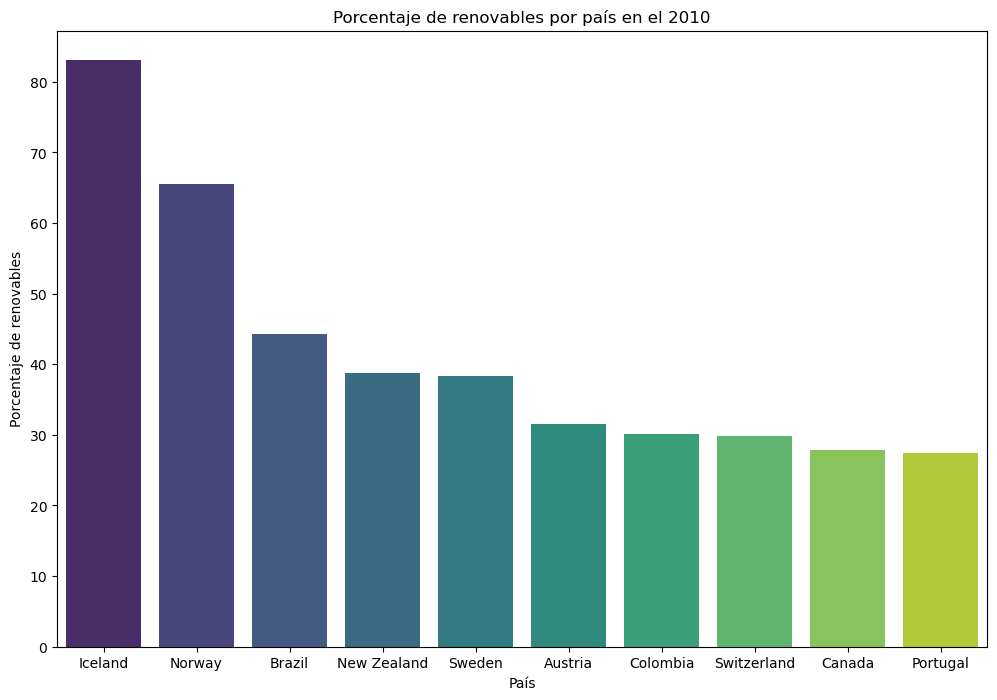

In [342]:
df_top_paises_mas_renovables = df.loc[df["Year"].dt.year == 2010]
df_top_paises_mas_renovables = df_top_paises_mas_renovables.sort_values(by="Renewables (% equivalent primary energy)",ascending=False)
df_top_paises_mas_renovables = df_top_paises_mas_renovables.head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="viridis")
plt.xlabel("País")
plt.ylabel("Porcentaje de renovables")
plt.title("Porcentaje de renovables por país en el 2010")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6184\338421085.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="light:b")


Text(0.5, 1.0, 'Porcentaje de renovables por país en el 2020')

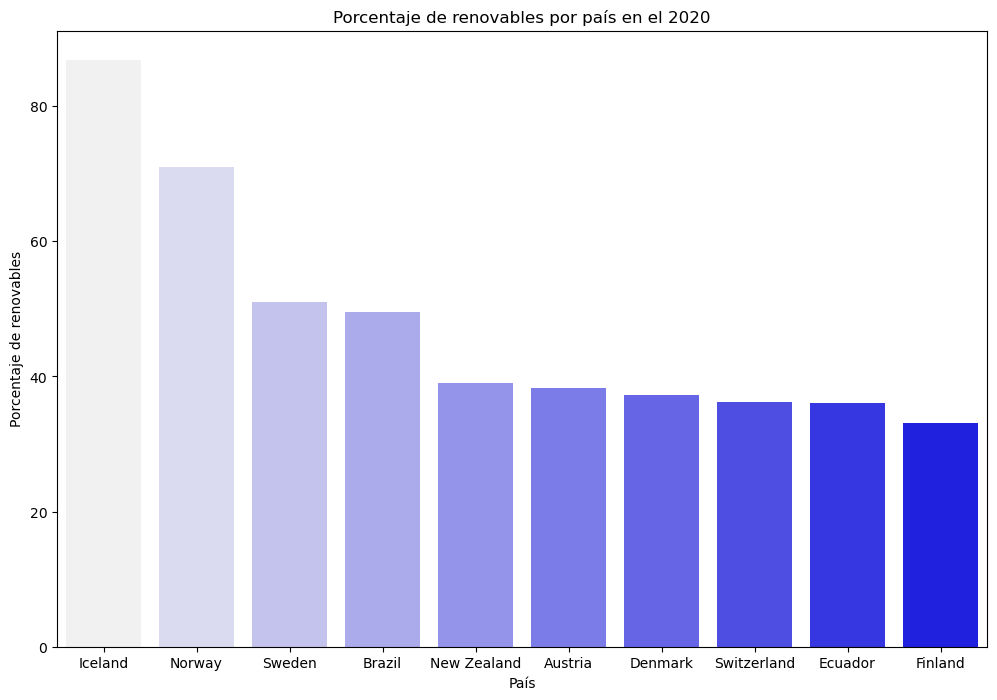

In [343]:
df_top_paises_mas_renovables = df.loc[df["Year"].dt.year == 2020]
df_top_paises_mas_renovables = df_top_paises_mas_renovables.sort_values(by="Renewables (% equivalent primary energy)",ascending=False)
df_top_paises_mas_renovables = df_top_paises_mas_renovables.head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=df_top_paises_mas_renovables,y="Renewables (% equivalent primary energy)",x="Entity",palette="light:b")
plt.xlabel("País")
plt.ylabel("Porcentaje de renovables")
plt.title("Porcentaje de renovables por país en el 2020")

Islandia,Noruega,Nueva Zelanda,Brazil y Suecia se han mantenido en los 20 años en el top 5 mientras que paises como Colombia y Perú han salido del top 10, por otro lado paises como Ecuador y Finlandia han entrado al top 10 en el 2020, todo esto tiene que ver con las politicas energeticas en estos paises,que por diversos factores y decisiones se ven cambiadas a lo largo de los años

Analizando si los paises con mas PIB per capita tienen mayor participacion de renovables en su matriz energética

Text(0.5, 1.0, 'Porcentaje de renovables vs PIB per capita')

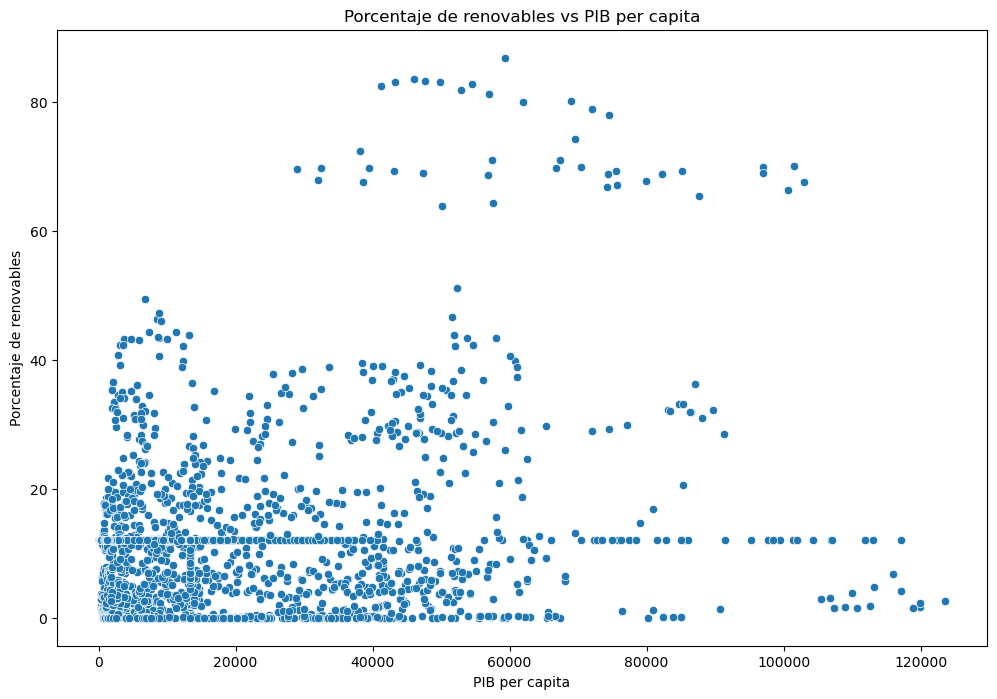

In [344]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="gdp_per_capita",y="Renewables (% equivalent primary energy)")
plt.xlabel("PIB per capita")
plt.ylabel("Porcentaje de renovables")
plt.title("Porcentaje de renovables vs PIB per capita")

Se observa que no hay una relacion alguna, el aumento de PIB per capita no implica mayor porcentaje de energias renovables, esto muestra que los paises desarrollados tienen una matriz energética variada y que no hay inversion en energias renovables

Matriz de correlacion para analizar que factores influyen en un mayor porcentaje de energias renovables

<Axes: >

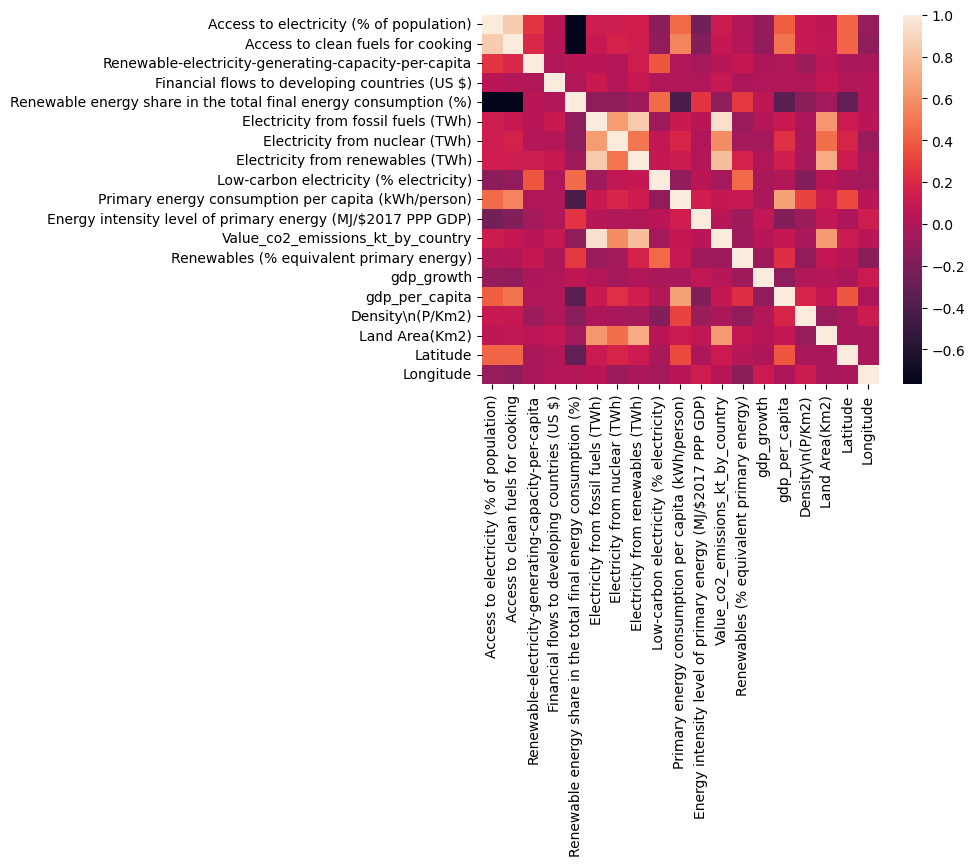

In [345]:
matriz = df.corr(numeric_only=True)
sns.heatmap(matriz)

Tomando las correlaciones superiores a 0.6 para el analisis

<Axes: >

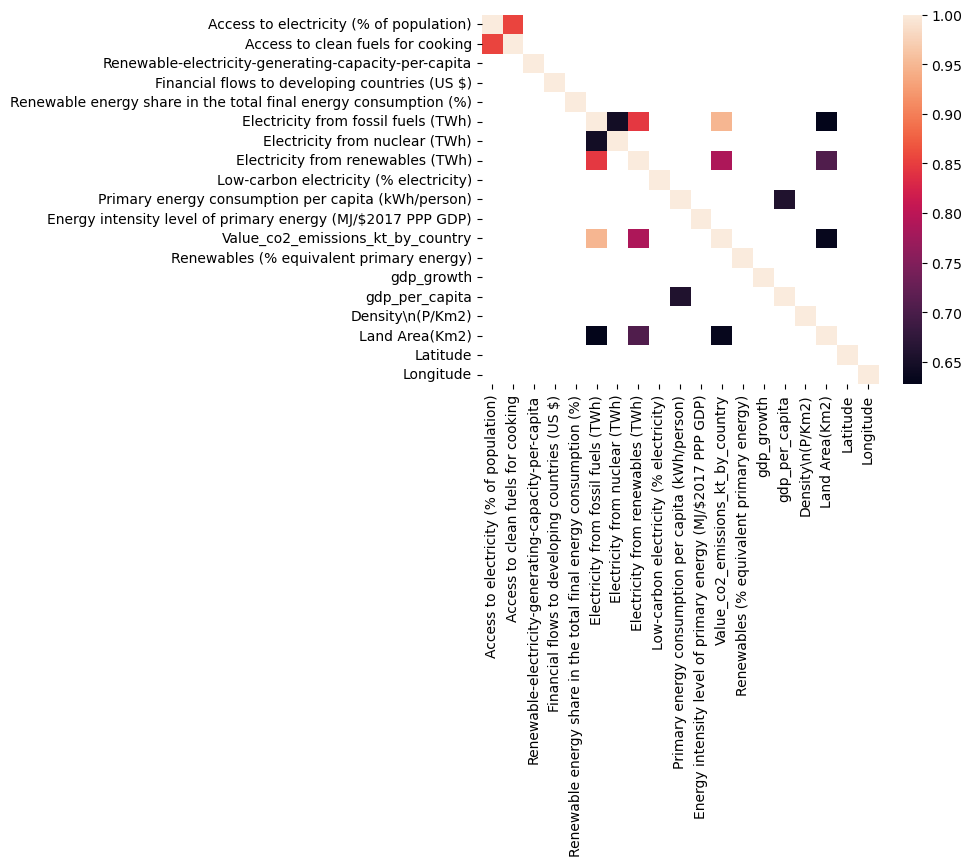

In [346]:
matriz_renovables = matriz[matriz>0.6]
sns.heatmap(matriz_renovables)

Se observa que la cantidad generada de combustibles nucleares,la cantidad generada de renovables,cantidad de emisiones de CO2 y el tamaño del pais son los  factores que tienen una correlacion superior a 0.6 respecto a la cantidad generada de energia proveniente de combustibles fósiles. Se tomarán estos para hacer una predicción

Una vez tomadas estos factores se hace la prediccion con el algoritmo Random Forest y XGBoost para comparar

Separacion de datos

In [347]:
df = df.drop_duplicates(subset=["Electricity from fossil fuels (TWh)","Electricity from renewables (TWh)", "Land Area(Km2)","Value_co2_emissions_kt_by_country"]).reset_index(drop=True)
x = df[["Electricity from nuclear (TWh)","Electricity from renewables (TWh)","Land Area(Km2)","Value_co2_emissions_kt_by_country"]]
y = df["Electricity from fossil fuels (TWh)"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)


RANDOM FOREST

In [348]:
random_forest = RandomForestRegressor(random_state=45)
parametros = {'n_estimators': [10, 20, 50, 100, 250,500],'max_depth': [None, 5, 10, 15,20],'min_samples_split': [2, 5, 10,20,50]}

grid_search = GridSearchCV(random_forest,param_grid=parametros,cv=5,scoring="r2")
grid_search.fit(x_train,y_train)

mejor_random_forest = grid_search.best_estimator_
prediccion_test = mejor_random_forest.predict(x_test)
prediccion_train = mejor_random_forest.predict(x_train)

r2_train_rf = r2_score(y_train,prediccion_train)
r2_test_rf = r2_score(y_test,prediccion_test)
print("R2 test:", r2_test_rf, "-- R2 train: ",r2_train_rf)
print("Mejores parámetros:", grid_search.best_params_)

R2 test: 0.9364761812440481 -- R2 train:  0.9737417945299018
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6184\599361244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia, x="Importancia", y="Variable", palette="viridis")


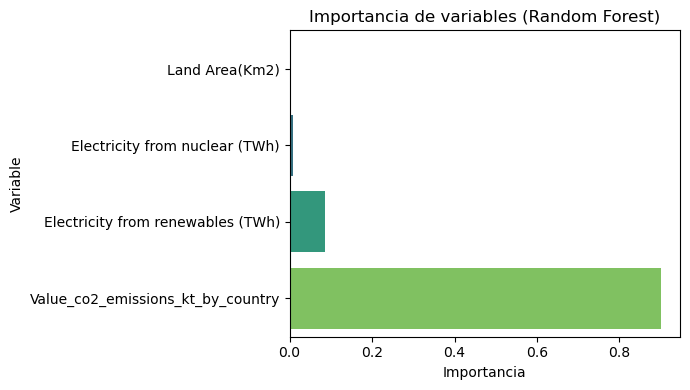

In [349]:
importancia = pd.DataFrame({
    "Variable": x.columns,
    "Importancia": mejor_random_forest.feature_importances_
}).sort_values("Importancia", ascending=True)

plt.figure(figsize=(7,4))
sns.barplot(data=importancia, x="Importancia", y="Variable", palette="viridis")
plt.title("Importancia de variables (Random Forest)")
plt.tight_layout()
plt.show()

XGBOOST

In [350]:

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')


param_grid = {'n_estimators': [10,50,100, 200, 400],'max_depth': [None,3, 5, 7],'learning_rate': [0.01,0.05, 0.1, 0.2],'reg_alpha': [0, 0.1, 0.5, 1, 5],'reg_lambda': [0, 0.5, 1, 5, 10]}

grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_xgb.fit(x_train, y_train)

best_xgb = grid_xgb.best_estimator_


y_pred_train = best_xgb.predict(x_train)
y_pred_test = best_xgb.predict(x_test)

r2_test_xgb = r2_score(y_test, y_pred_test)
r2_train_xgb = r2_score(y_train, y_pred_train)

print("Mejores parámetros:", grid_xgb.best_params_)
print(f"R² Train: {r2_train_xgb:.3f}")
print(f"R² Test:  {r2_test_xgb:.3f}")


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 5, 'reg_lambda': 10}
R² Train: 1.000
R² Test:  0.968


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6184\1201187676.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia, x="Importancia", y="Variable", palette="mako")


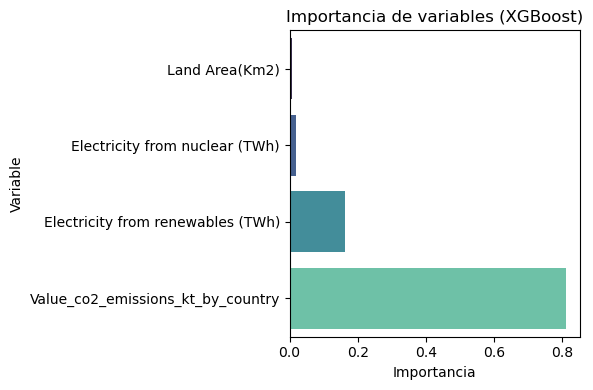

In [351]:
importancia = pd.DataFrame({
    "Variable": x.columns,
    "Importancia": best_xgb.feature_importances_
}).sort_values(by="Importancia", ascending=True)

plt.figure(figsize=(6,4))
sns.barplot(data=importancia, x="Importancia", y="Variable", palette="mako")
plt.title("Importancia de variables (XGBoost)")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Puntajes R2 de entrenamiento y de test para los distintos modelos')

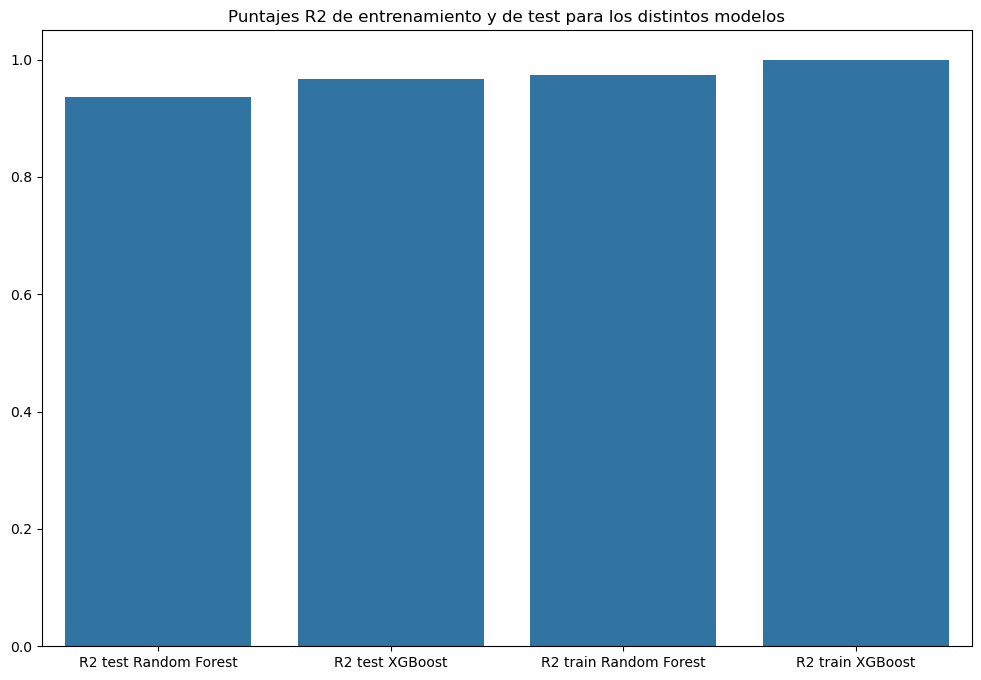

In [352]:
plt.figure(figsize=(12,8))
sns.barplot(x=["R2 test Random Forest","R2 test XGBoost","R2 train Random Forest","R2 train XGBoost"],y=[r2_test_rf,r2_test_xgb,r2_train_rf,r2_train_xgb])
plt.title("Puntajes R2 de entrenamiento y de test para los distintos modelos")

Los modelos de Random Forest y XGBoost presentan un desempeño muy alto en el conjunto de entrenamiento, con valores de R² cercanos a 1, lo que indica que ambos ajustan casi perfectamente los datos de entrenamiento. Sin embargo, el hecho de que el XGBoost alcance un R² = 1 sugiere un claro sobreajuste (overfitting): el modelo ha aprendido en exceso las particularidades del conjunto de entrenamiento y puede no generalizar bien a datos nuevos.

Por otro lado, el Random Forest muestra un R² ligeramente inferior pero más equilibrado entre entrenamiento y prueba, lo que indica una mejor capacidad de generalización.